<a href="https://colab.research.google.com/github/EmelyanovAndreyNSK/PythonTasks/blob/master/MstatLab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats 
from scipy.stats import gamma
import random
import math

In [ ]:
# 1

N = 50000
a, b = 10., 1.5

n = 100
div = np.zeros(N)

for i in range(n):
  s = gamma.rvs(b, scale = 1/a, size = N)
  for i in range(1,N):
    s[i] = s[i] + s[i - 1]
  for i in range(1,N):
    s[i] = s[i]/i 
  for i in range(N):
    div[i] += abs(b / a - s[i])

for i in range(1, N):
    div[i] = div[i] / n
    div[i] = abs(div[i] - 1/(i**(1 / 2)))

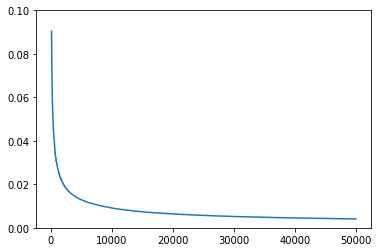

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_ylim([0.0, 0.1])

plt.plot(range(100,N), div[100:N])
plt.show() #сходимость к 0 разницы усредненной погрешности 
           #и 1/sqrt(n)

In [ ]:
# 2

from scipy.stats import norm

N = 2000
numbers_in_formula = list()
 
for i in range(N):
  random_numbers = list()
  for i in range(N):
    random_numbers.append(gamma.rvs(b, scale = 1/a))
 
  expected_value = b / a
  variance = b / a / a
  numbers_in_formula.append((sum(random_numbers) 
  - N * expected_value) / math.sqrt(N * variance))



Среднее отклонение:  0.01265029167264178


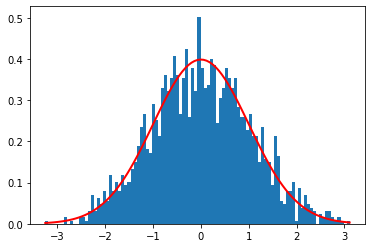

In [ ]:
sr_otkl = 0

for i in range(1, N):
  sr_otkl = sr_otkl + (numbers_in_formula[i] - 1/( np.sqrt(2 * np.pi)) *np.exp( - (i)**2 / 2))

sr_otkl = sr_otkl / (N - 1)
print('Среднее отклонение: ', sr_otkl)

count, bins, ignored = plt.hist(numbers_in_formula, 100, density=True)
plt.plot(bins, 1/( np.sqrt(2 * np.pi)) *
np.exp( - (bins)**2 / 2 ),
linewidth=2, color='r')
plt.show()

In [ ]:
!pip install tick

In [87]:
#3

from tick.hawkes import SimuPoissonProcess
from tick.plot import plot_point_process 
from numpy import arange
import statistics 

time_from_int = list()
split = np.arange(0.001, 5, 0.1)

for intensity in split:
  waiting_time = list()
  count = 0
  poi = SimuPoissonProcess(intensity, verbose = False, max_jumps = 2)
  
  while (count < 500):
    poi.track_intensity(100)
    poi.simulate()
    arr = poi.intensity_tracked_times    
    poi.reset()

    if (len(arr) > 1 and arr[1] < 0.5 and arr[2] > 0.5):
      count += 1
      waiting_time.append(arr[2] - arr[1])

  time_from_int.append(sum(waiting_time) / count)


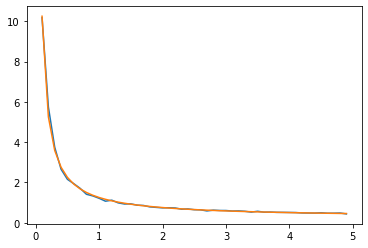

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(split, time_from_int)
plt.plot(split, (1 / 4 + 1 / split))
plt.show()